<a href="https://colab.research.google.com/github/fahadshakeel23/DataScience/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



In [6]:
# Load the dataset - we'll use the "Mall Customers" dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"

data = pd.read_csv(url)

data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


Step 2: Select Features for Clustering

In [7]:
# Some columns are categorical lets use the main spending features

features= ['Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergents_Paper', 'Delicassen']
X = data[features]

#scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Step 3: Elbow Method to Find Optimal Clusters

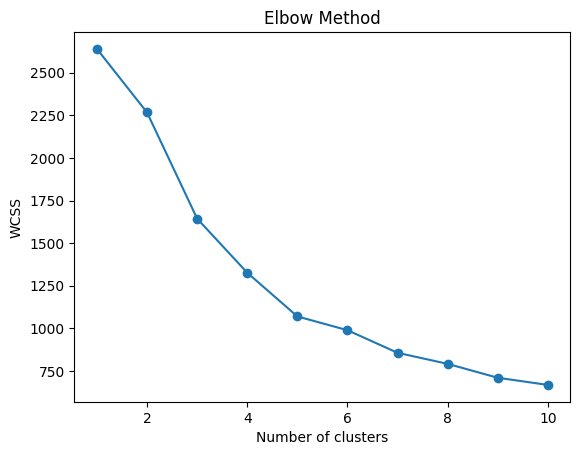

In [9]:
wcss = []
for i in range(1, 11):
    Kmeans = KMeans(n_clusters=i, random_state = 42)
    Kmeans.fit(X_scaled)
    wcss.append(Kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel("WCSS")
plt.show()

Step 4: Apply K-Means Clustering

In [13]:
# Pick optimal k(usually 3-5 based on elbow plot)

kmeans = KMeans(n_clusters=3, random_state = 42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

Step 5: Visualize Clusters (First Two Features)

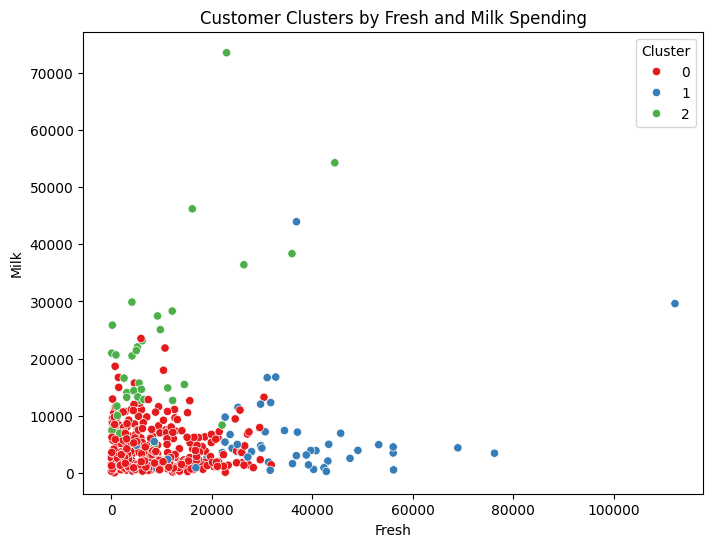

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Fresh', y='Milk', hue='Cluster', data=data, palette='Set1')
plt.title('Customer Clusters by Fresh and Milk Spending')
plt.show()

Step 6: Cluster Profiles

In [15]:
data.groupby('Cluster').mean()[features]

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
Cluster,,,,,,
0,8935.500000,4228.528571,5848.034286,2167.231429,1913.605714,1102.120000
1,34540.113208,5860.358491,6122.622642,9841.735849,981.471698,3664.245283
2,8704.864865,20534.405405,30466.243243,1932.621622,14758.837838,2459.351351
